In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.tree import DecisionTreeClassifier as Dc,plot_tree  as pt
from sklearn.model_selection import train_test_split as tt

In [5]:
data=pd.read_csv(r"D:\ml lab data set\car_data.csv")

In [6]:
data.head()


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [7]:
x=data.drop(columns=['Purchased','User ID'])
y=data['Purchased']

In [9]:
lg=Le()

In [10]:
x['Gender']=lg.fit_transform(x['Gender'])

In [11]:
x_train,x_test,y_train,y_test=tt(x,y,test_size=0.2,random_state=3)

In [12]:
modal=Dc(max_depth=3,random_state=7)

In [13]:
modal.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [14]:
y_prd=modal.predict(x_test)

In [15]:
from sklearn import metrics

In [16]:
cm=metrics.confusion_matrix(y_test,y_prd)
acc=metrics.accuracy_score(y_test,y_prd)
cl=metrics.classification_report(y_test,y_prd)



In [17]:
print(acc,cl)

0.895               precision    recall  f1-score   support

           0       0.94      0.87      0.91       116
           1       0.84      0.93      0.88        84

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [18]:
import seaborn as ss

<Axes: >

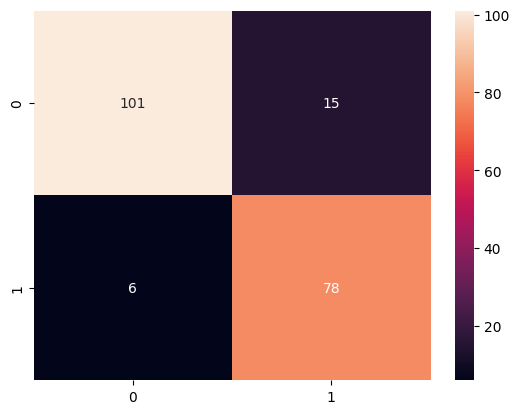

In [24]:
ss.heatmap(cm,annot=True,fmt='d')

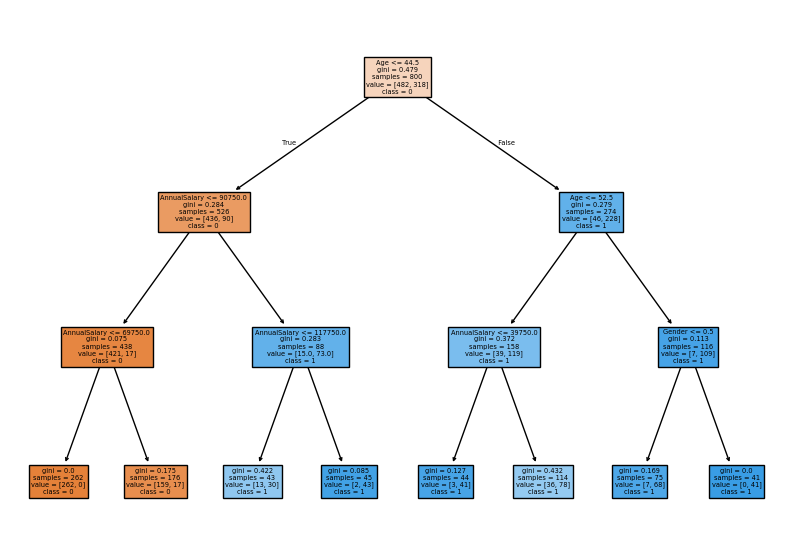

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
pt(modal,filled=True,feature_names=x.columns,class_names=['0','1'])
plt.show()